# 1. Data Import and Understanding

1.1 Importing required libraries and reading data

In [1]:
#import required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import tensorflow as tf

In [2]:
#reading data
df=pd.read_csv("Signal.csv")
df.head(2)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


1.2 Checking missing values and percentage

In [3]:
df.shape,df.size
# df.dtypes

((1599, 12), 19188)

In [4]:
missing_values = df.isnull().sum()/len(df)*100
print(missing_values)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


<AxesSubplot:>

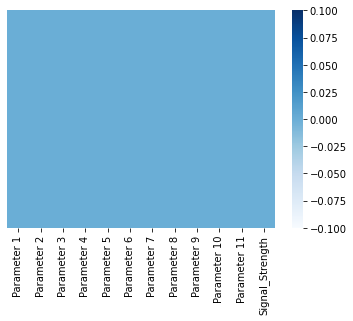

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='Blues')

1.3 Presence of duplicate dataset

In [6]:
percentage = df.duplicated(keep=False).value_counts(normalize=True) * 100
print (percentage)

False    71.23202
True     28.76798
dtype: float64


In [7]:
df=df.drop_duplicates()

1.4 Visualize distribution of target varialbles

<AxesSubplot:ylabel='Signal_Strength'>

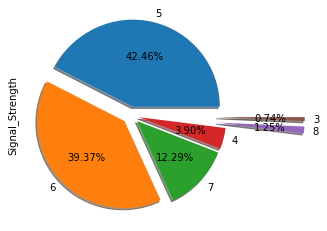

In [8]:
def func(pct):
  return "{:1.2f}%".format(pct)

df['Signal_Strength'].value_counts().plot(kind='pie',autopct=lambda pct: func(pct), explode=[0.1,0.1,0.1,0.1,1,1],shadow=True)

<AxesSubplot:ylabel='Density'>

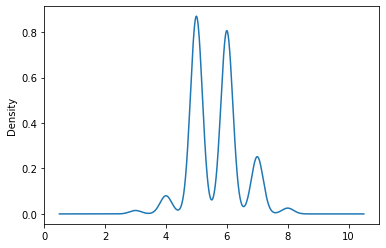

In [9]:
df['Signal_Strength'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

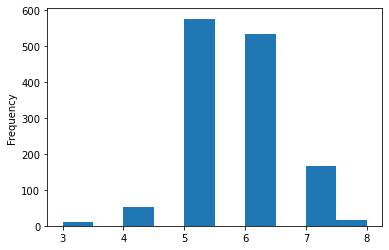

In [10]:
df['Signal_Strength'].plot.hist()

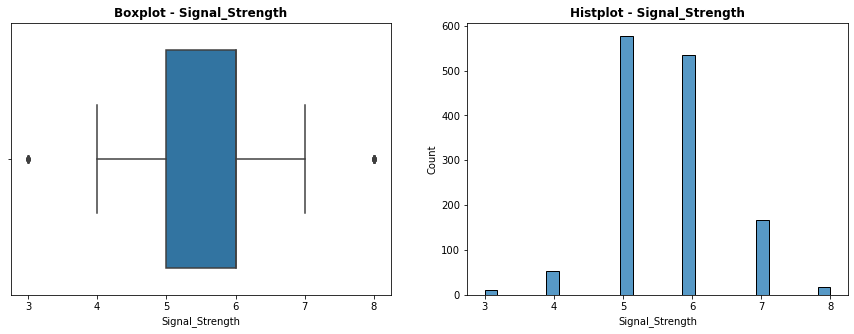

In [11]:
col = 'Signal_Strength'
x1 = df[col]

_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');

The signal strength is max at 5th and 6th Parameter

While Parameter 3 and 8 are outliers

# 2. Data preprocessing

2.1 Split the data into X & Y

In [12]:
X= df.drop(['Signal_Strength'], axis = 1)
Y = df['Signal_Strength']
print(X.shape,X.size)
print(Y.shape,Y.size)

(1359, 11) 14949
(1359,) 1359


2.2 Splitting data into training & testing, 70:30 ratio

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.3, random_state =42)

2.3 Checking the shape of of the training and testing dataset to be in sync

In [14]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(951, 11) (408, 11) (951,) (408,)


2.4 Data normalization

In [15]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

2.5 Transform labels into format acceptable by neural networks

In [16]:
label_encoder = OneHotEncoder(sparse=False)
Y_train=label_encoder.fit_transform(Y_train.to_frame())
Y_test=label_encoder.fit_transform(Y_test.to_frame())

# 3. Model Training and evaluation using neural network

3.1 Design a neural network

In [17]:
model = Sequential([Input(shape=(11,)), 
                   Dense(512,activation='relu'), 
                   Dense(128,activation='relu'),
                   Dense(6,activation='softmax')])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6144      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total params: 72,582
Trainable params: 72,582
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01), metrics = ['accuracy'])

3.2 Training the classifier 

In [20]:
train = model.fit(X_train_sc, Y_train, epochs=50,batch_size=150, validation_data=(X_test_sc,Y_test))

Epoch 1/50
7/7 [==============================] - 0s 41ms/step - loss: 1.3888 - accuracy: 0.4427 - val_loss: 1.2314 - val_accuracy: 0.4412
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 1.1740 - accuracy: 0.4869 - val_loss: 1.0983 - val_accuracy: 0.5637
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 1.0703 - accuracy: 0.5499 - val_loss: 1.0151 - val_accuracy: 0.5980
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 1.0425 - accuracy: 0.5605 - val_loss: 0.9697 - val_accuracy: 0.5809
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 1.0169 - accuracy: 0.5647 - val_loss: 0.9735 - val_accuracy: 0.6201
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.9949 - accuracy: 0.5783 - val_loss: 0.9475 - val_accuracy: 0.5931
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.9850 - accuracy: 0.5762 - val_loss: 0.9630 - val_accuracy: 0.5809
Epoch 8/50
7/7 [=================

3.3 Plotting of Training-Validation accuracy and Training-Validation loss of model

Text(0.5, 1.0, 'Training and validation loss')

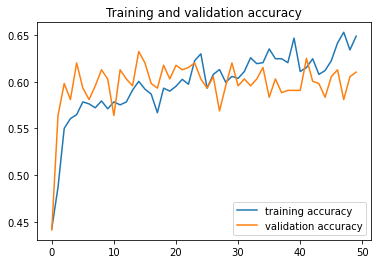

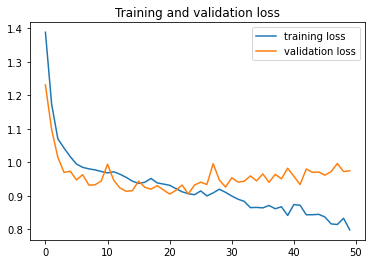

In [21]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy' )
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss' )
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

In [22]:
scores = model.evaluate(X_test_sc, Y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.9749144911766052
Accuracy: 0.6102941036224365


In [23]:
Y_pred = model.predict(X_test_sc)
Y_pred=np.argmax(Y_pred, axis=1)
Y_test=np.argmax(Y_test, axis=1)
print("Test Classification Report",classification_report(Y_test,Y_pred))

Test Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        13
           2       0.64      0.80      0.71       172
           3       0.60      0.52      0.56       164
           4       0.56      0.50      0.53        50
           5       0.00      0.00      0.00         4

    accuracy                           0.61       408
   macro avg       0.30      0.30      0.30       408
weighted avg       0.58      0.61      0.59       408



3.4 New architecture with upsampled data

In [24]:
smote=SMOTE("minority")
X_res,Y_res = smote.fit_resample(X,Y)

In [25]:
X_res.shape,Y_res.shape

((1926, 11), (1926,))

In [26]:
## Checking the distribution of the resampled target class
pd.DataFrame(Y_res).value_counts(normalize=True)*100

Signal_Strength
3                  29.958463
5                  29.958463
6                  27.777778
7                   8.670820
4                   2.751817
8                   0.882658
dtype: float64

In [27]:
## Splitting the balanced data into train and test.
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_res,Y_res, test_size=0.30, random_state=42)
print(X_train1.shape,X_test1.shape)
print(Y_train1.shape,Y_test1.shape)

(1348, 11) (578, 11)
(1348,) (578,)


In [28]:
#normalize the dataset
scaler = MinMaxScaler()
X_train_sc1 = scaler.fit_transform(X_train1)
X_test_sc1 = scaler.transform(X_test1)

In [29]:
#formatting labels
label_encoder = OneHotEncoder(sparse=False)
Y_train1=label_encoder.fit_transform(Y_train1.to_frame())
Y_test1=label_encoder.fit_transform(Y_test1.to_frame())

In [30]:
#model building
model1 = Sequential([Input(shape=(11,)), 
                   Dense(512,activation='relu'),
                   Dense(256,activation='relu'), 
                   Dense(128,activation='relu'),
                   Dense(6,activation='softmax')])

In [31]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               6144      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
Total params: 171,142
Trainable params: 171,142
Non-trainable params: 0
_________________________________________________________________


In [32]:
from tensorflow.keras.optimizers import Adam

model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [33]:
#training the classifier
train1 = model1.fit(X_train_sc1, Y_train1, epochs=50,batch_size=150, validation_data=(X_test_sc1,Y_test1))

Epoch 1/50
9/9 [==============================] - 0s 28ms/step - loss: 1.5943 - accuracy: 0.4978 - val_loss: 1.3609 - val_accuracy: 0.5554
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 1.3291 - accuracy: 0.5408 - val_loss: 1.1850 - val_accuracy: 0.5796
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 1.1636 - accuracy: 0.5571 - val_loss: 1.0424 - val_accuracy: 0.5900
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 1.0371 - accuracy: 0.5809 - val_loss: 0.9477 - val_accuracy: 0.6298
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.9631 - accuracy: 0.6083 - val_loss: 0.9139 - val_accuracy: 0.6419
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 0.9360 - accuracy: 0.6142 - val_loss: 0.9089 - val_accuracy: 0.6713
Epoch 7/50
9/9 [==============================] - 0s 11ms/step - loss: 0.9019 - accuracy: 0.6150 - val_loss: 0.8902 - val_accuracy: 0.6696
Epoch 8/50
9/9 [===============

3.5 Plotting of Training-Validation accuracy and Training-Validation loss of model1

Text(0.5, 1.0, 'Training and validation loss')

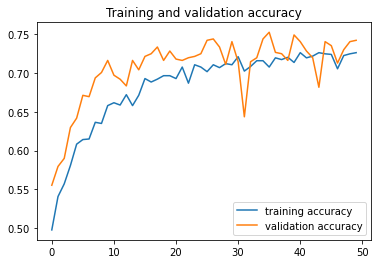

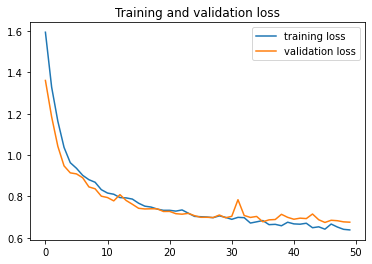

In [34]:
accuracy = train1.history['accuracy']
val_accuracy = train1.history['val_accuracy']
loss = train1.history['loss']
val_loss = train1.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy' )
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss' )
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

In [35]:
scores = model1.evaluate(X_test_sc1, Y_test1, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6751804947853088
Accuracy: 0.742214560508728


In [36]:
Y_pred1 = model1.predict(X_test_sc1)
Y_pred1=np.argmax(Y_pred1, axis=1)
Y_test1=np.argmax(Y_test1, axis=1)
print("Test Classification Report",classification_report(Y_test1,Y_pred1))

Test Classification Report               precision    recall  f1-score   support

           0       0.96      1.00      0.98       185
           1       0.00      0.00      0.00        12
           2       0.72      0.68      0.70       169
           3       0.61      0.68      0.64       161
           4       0.44      0.44      0.44        45
           5       0.00      0.00      0.00         6

    accuracy                           0.74       578
   macro avg       0.45      0.47      0.46       578
weighted avg       0.72      0.74      0.73       578

